In [92]:
import os

import numpy as np
import pandas as pd
import time
pd.options.mode.chained_assignment = None
import math
import numpy as np
import copy
from datetime import datetime
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv('Consumption/TexasHarrisConsumption15.csv')

data['weekday'] = [datetime.strptime(data['TimeStamp'].iloc[i], "%Y-%m-%d  %H:%M:%S").weekday() + 1 for i in range(len(data))]
entries1 = [c for c in data.columns[1:-1] if '-1' in c]
entries2 = [c for c in data.columns[1:-1] if '-2' in c]
data['aggregation-1'] = sum(data[entry] for entry in entries1)
data['aggregation-2'] = sum(data[entry] for entry in entries2)

In [69]:
data.iloc[18144]

TimeStamp        2018-07-09 00:15:00
100129-1                    1.055217
100129-2                    1.055217
100753-1                     2.23753
100753-2                    3.447212
102266-1                       0.377
102266-2                    1.552086
102626-1                    0.837646
102626-2                    0.837646
103953-1                    1.378253
103953-2                    1.377699
104401-1                    1.532348
104401-2                    1.650398
104530-1                    1.241205
104530-2                    1.241205
10481-1                     2.203923
10481-2                     2.203923
124666-1                    0.301275
124666-2                    0.301275
129490-1                    0.871577
129490-2                     0.76225
130673-1                     0.74163
130673-2                     0.74163
135154-1                     2.71569
135154-2                    2.714424
137793-1                    0.606214
137793-2                    0.606214
1

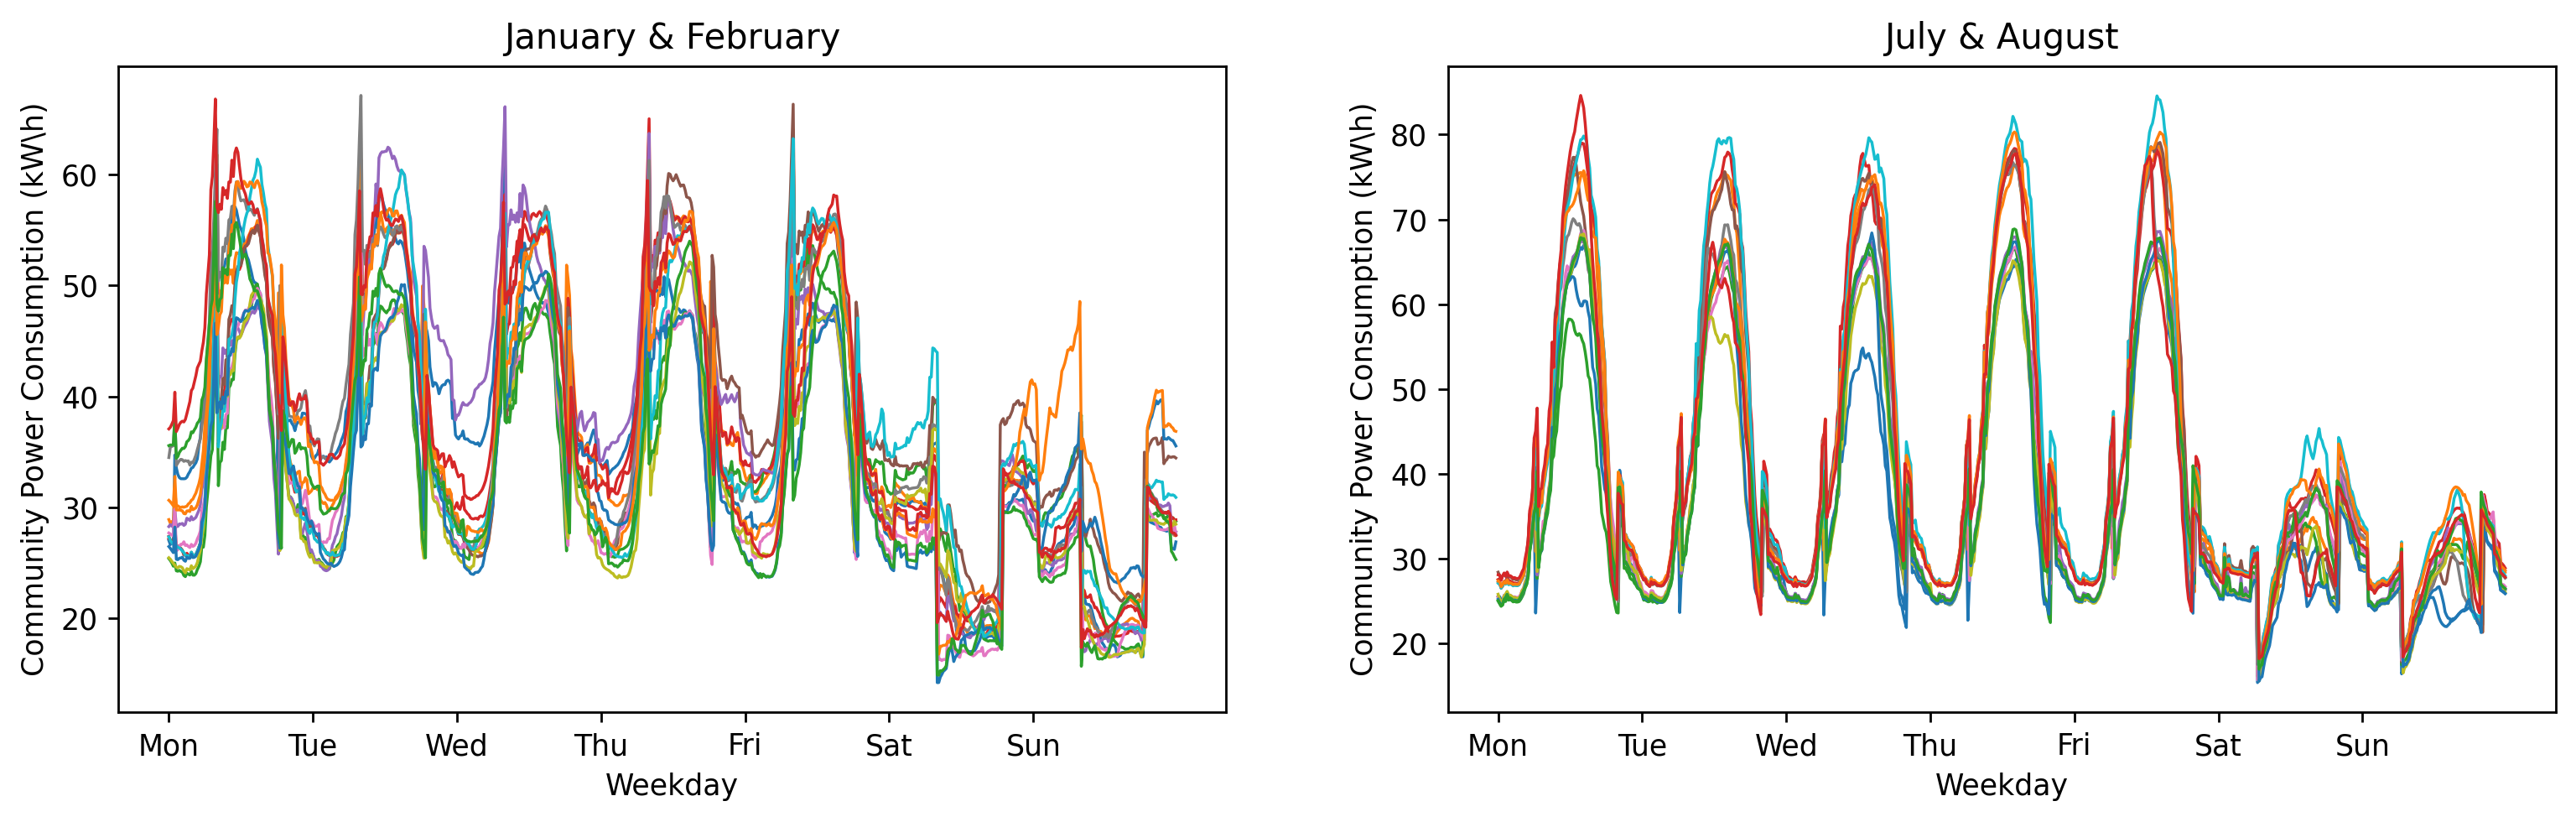

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=250)
h = 7*24*4
c = 7
j_start = (31+29+31+31+30+31)*24*4
for d in range(c):
    axs[0].plot(range(h), data['aggregation-1'].iloc[d*h: (d+1)*h], linewidth=1)
    axs[0].plot(range(h), data['aggregation-2'].iloc[d*h: (d+1)*h], linewidth=1)

while True:
    if data['weekday'].iloc[j_start] != 1:
        j_start -= 24*4
    else:
        break

for d in range(c):
    axs[1].plot(range(h), data['aggregation-1'].iloc[j_start + d*h: j_start + (d+1)*h], linewidth=1)
    axs[1].plot(range(h), data['aggregation-2'].iloc[j_start + d*h: j_start + (d+1)*h], linewidth=1)

axs[0].set_title('January & February')
axs[1].set_title('July & August')

axs[0].set_xticks([24*4*i for i in range(7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axs[1].set_xticks([24*4*i for i in range(7)], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

axs[0].set_xlabel('Weekday')
axs[0].set_ylabel('Community Power Consumption (kW\h)')

axs[1].set_xlabel('Weekday')
axs[1].set_ylabel('Community Power Consumption (kW\h)')

plt.savefig('IMG/JanFeb-JulAug.jpg', bbox_inches='tight')

### Months Separation

In [79]:
'''Jan and Feb'''
Start = 0
JF = 31 + 29
resolution = 24*4
JanFeb = pd.DataFrame(index=range(24))
truncated = data.iloc[Start * resolution:JF * resolution]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/resolution))
we = range(int(len(weekend)/resolution))
JanFeb = pd.DataFrame(index=range(resolution), columns=[f'weekday{j}-{i}' for i in (1, 2) for j in wd] + [f'weekend{j}-{i}' for i in (1, 2) for j in we])
for j in range(int(len(weekday)/resolution)):
    JanFeb[f'weekday{j}-1'] = weekday['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    JanFeb[f'weekday{j}-2'] = weekday['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
for j in range(int(len(weekend)/resolution)):
    JanFeb[f'weekend{j}-1'] = weekend['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    JanFeb[f'weekend{j}-2'] = weekend['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
Start += JF


'''Mar and Apr'''
MA = 31 + 30
truncated = data.iloc[Start * resolution:(Start + MA) * resolution]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/resolution))
we = range(int(len(weekend)/resolution))
MarApr = pd.DataFrame(index=range(resolution), columns=[f'weekday{j}-{i}' for i in (1, 2) for j in wd] + [f'weekend{j}-{i}' for i in (1, 2) for j in we])
for j in wd:
    MarApr[f'weekday{j}-1'] = weekday['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    MarApr[f'weekday{j}-2'] = weekday['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
for j in range(int(len(weekend)/resolution)):
    MarApr[f'weekend{j}-1'] = weekend['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    MarApr[f'weekend{j}-2'] = weekend['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
Start += MA


'''May and Jun'''
MJ = 31 + 30
truncated = data.iloc[Start * resolution:(Start + MJ) * resolution]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/resolution))
we = range(int(len(weekend)/resolution))
MayJun = pd.DataFrame(index=range(resolution), columns=[f'weekday{j}-{i}' for i in (1, 2) for j in wd] + [f'weekend{j}-{i}' for i in (1, 2) for j in we])
for j in wd:
    MayJun[f'weekday{j}-1'] = weekday['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    MayJun[f'weekday{j}-2'] = weekday['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
for j in range(int(len(weekend)/resolution)):
    MayJun[f'weekend{j}-1'] = weekend['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    MayJun[f'weekend{j}-2'] = weekend['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
Start += MJ


'''Jul and Aug'''
JA = 31 + 31
truncated = data.iloc[Start * resolution:(Start + JA) * resolution]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/resolution))
we = range(int(len(weekend)/resolution))
JulAug = pd.DataFrame(index=range(resolution), columns=[f'weekday{j}-{i}' for i in (1, 2) for j in wd] + [f'weekend{j}-{i}' for i in (1, 2) for j in we])
for j in wd:
    JulAug[f'weekday{j}-1'] = weekday['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    JulAug[f'weekday{j}-2'] = weekday['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
for j in range(int(len(weekend)/resolution)):
    JulAug[f'weekend{j}-1'] = weekend['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    JulAug[f'weekend{j}-2'] = weekend['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
Start += JA


'''Sep and Oct'''
SO = 30 + 31
truncated = data.iloc[Start * resolution:(Start + JA) * resolution]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/resolution))
we = range(int(len(weekend)/resolution))
SepOct = pd.DataFrame(index=range(resolution), columns=[f'weekday{j}-{i}' for i in (1, 2) for j in wd] + [f'weekend{j}-{i}' for i in (1, 2) for j in we])
for j in wd:
    SepOct[f'weekday{j}-1'] = weekday['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    SepOct[f'weekday{j}-2'] = weekday['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
for j in range(int(len(weekend)/resolution)):
    SepOct[f'weekend{j}-1'] = weekend['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    SepOct[f'weekend{j}-2'] = weekend['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
Start += SO


'''Nov and Dec'''
ND = 30 + 31
truncated = data.iloc[Start * resolution:(Start + JA) * resolution]
weekday = truncated[truncated['weekday'] < 6]
weekend = truncated[truncated['weekday'] >= 6]
wd = range(int(len(weekday)/resolution))
we = range(int(len(weekend)/resolution))
NovDec = pd.DataFrame(index=range(resolution), columns=[f'weekday{j}-{i}' for i in (1, 2) for j in wd] + [f'weekend{j}-{i}' for i in (1, 2) for j in we])
for j in wd:
    NovDec[f'weekday{j}-1'] = weekday['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    NovDec[f'weekday{j}-2'] = weekday['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values
for j in range(int(len(weekend)/resolution)):
    NovDec[f'weekend{j}-1'] = weekend['aggregation-1'].iloc[j*resolution : (j+1)*resolution].values
    NovDec[f'weekend{j}-2'] = weekend['aggregation-2'].iloc[j*resolution : (j+1)*resolution].values


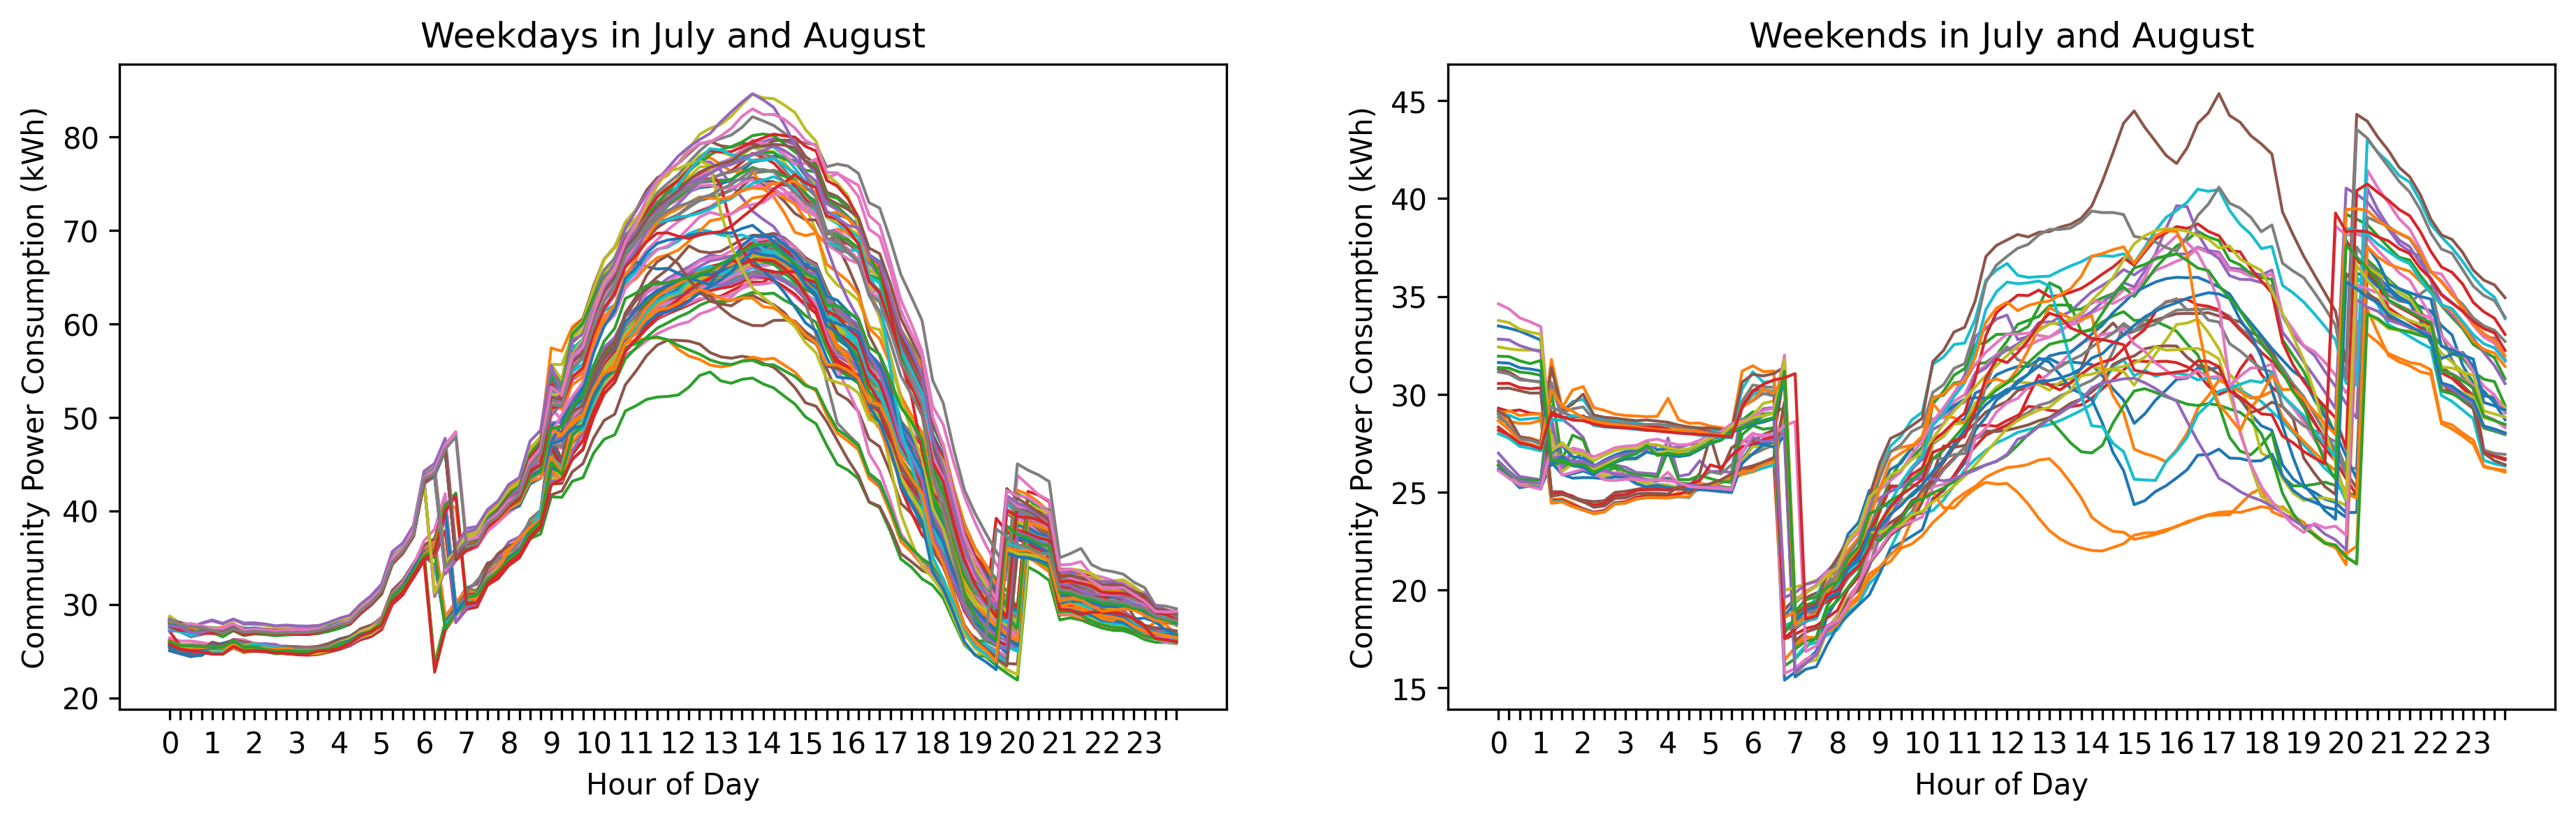

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
for j in JulAug.columns:
    if 'weekday' in j:
        axs[0].plot(range(resolution), JulAug[j], linewidth=1)
    else:
        axs[1].plot(range(resolution), JulAug[j], linewidth=1)

axs[0].set_title('Weekdays in July and August')
axs[1].set_title('Weekends in July and August')

axs[0].set_xlabel('Hour of Day')
axs[1].set_xlabel('Hour of Day')

axs[0].set_ylabel('Community Power Consumption (kWh)')
axs[1].set_ylabel('Community Power Consumption (kWh)')

ticks = []
for i in range(resolution):
    if i%4 == 0:
        ticks.append(str(int(i/4)))
    else:
        ticks.append('')
axs[0].set_xticks(range(resolution), ticks)
axs[1].set_xticks(range(resolution), ticks)
plt.savefig('IMG/Weekday-Weekend-JulAug.jpg', bbox_inches='tight')

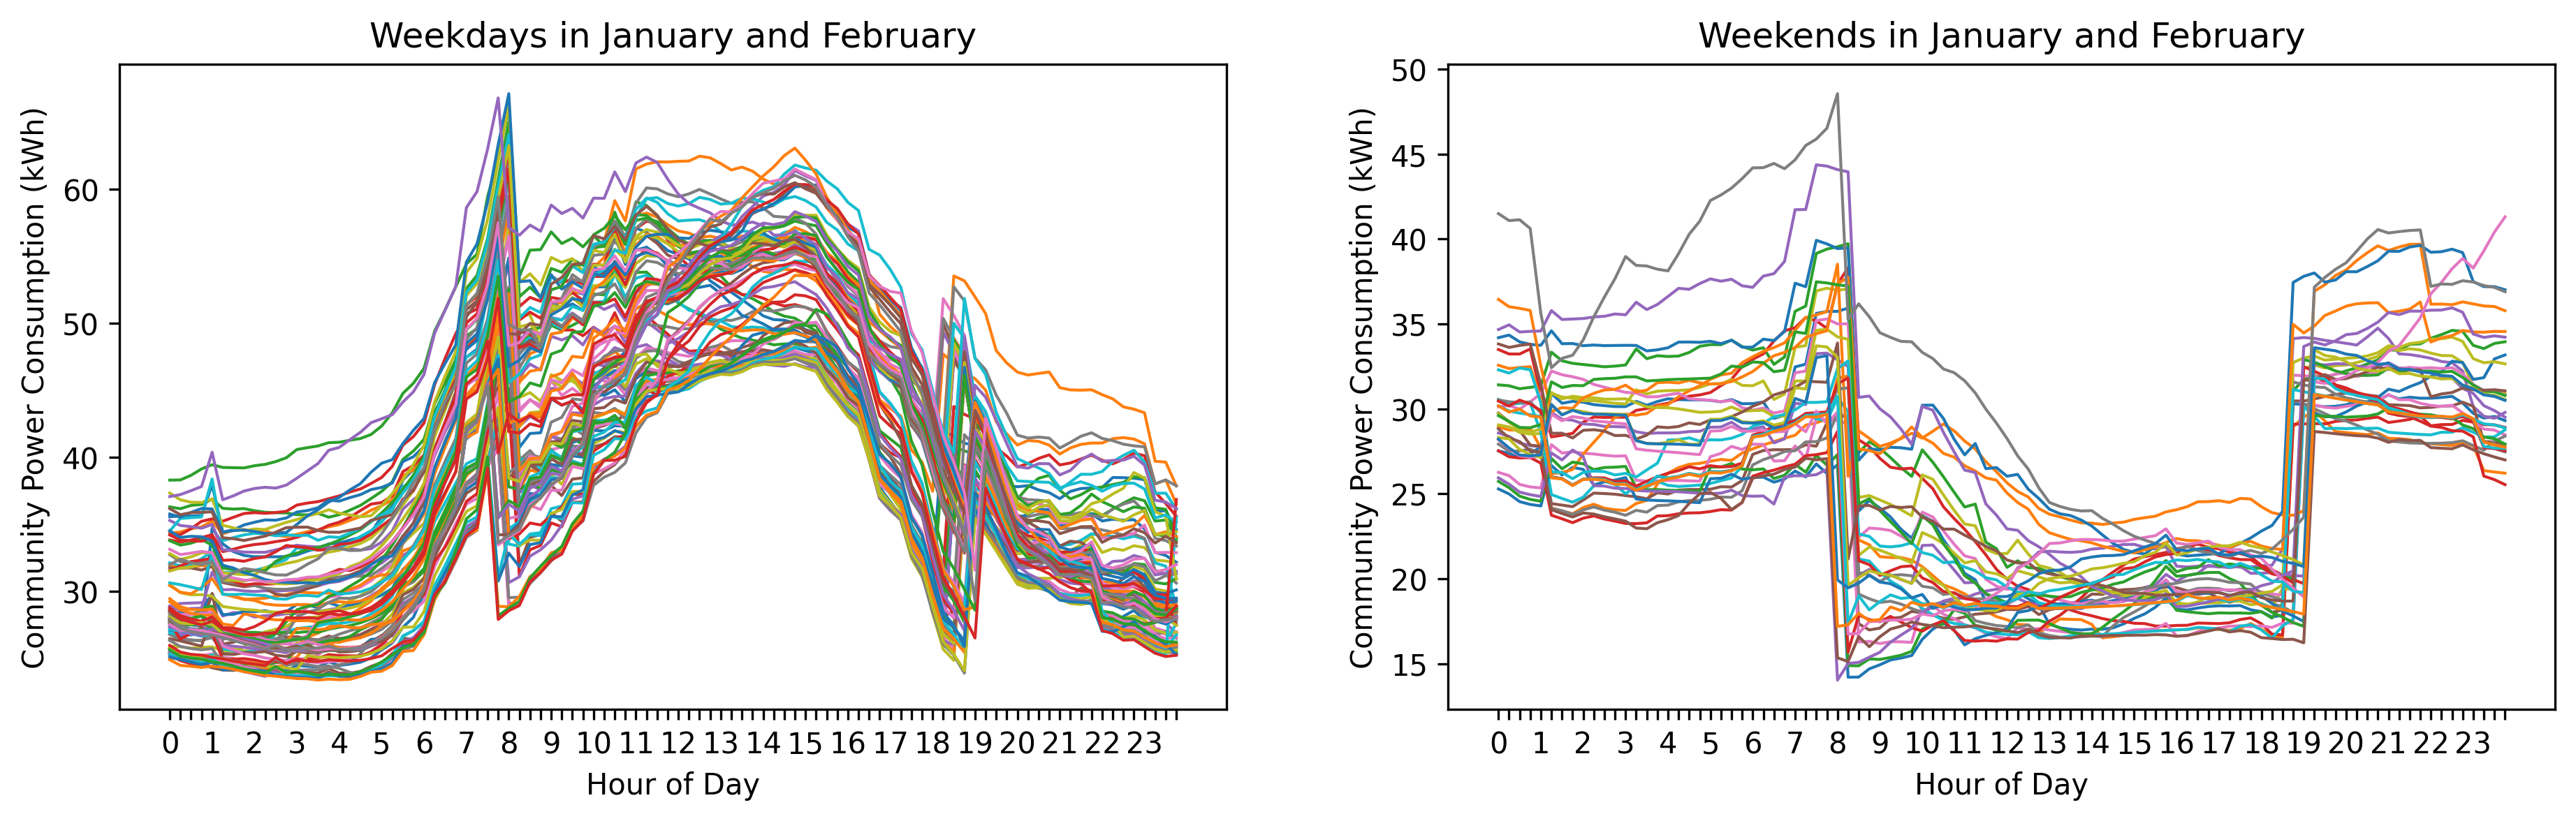

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=300)
for j in JanFeb.columns:
    if 'weekday' in j:
        axs[0].plot(range(resolution), JanFeb[j], linewidth=1)
    else:
        axs[1].plot(range(resolution), JanFeb[j], linewidth=1)

axs[0].set_title('Weekdays in January and February')
axs[1].set_title('Weekends in January and February')

axs[0].set_xlabel('Hour of Day')
axs[1].set_xlabel('Hour of Day')

axs[0].set_ylabel('Community Power Consumption (kWh)')
axs[1].set_ylabel('Community Power Consumption (kWh)')

axs[0].set_xticks(range(resolution), ticks)
axs[1].set_xticks(range(resolution), ticks)
plt.savefig('IMG/Weekday-Weekend-JanFeb.jpg', bbox_inches='tight')

In [99]:
months = [JanFeb, MarApr, MayJun, JulAug, SepOct, NovDec]
for m in months:
    weekday_list = [c for c in m.columns if 'weekday' in c]
    weekend_list = [c for c in m.columns if 'weekend' in c]

    counter = 1
    while counter <= 100:
        c1 = random.choice(weekday_list)
        while True:
            c2 = random.choice(weekday_list)
            if c2 != c1:
                break
        m[f'weekdayG-{counter}'] = 0.5*(m[c1].values + m[c2].values) + np.array([np.random.randn() for _ in m[c2].values])

        c1 = random.choice(weekend_list)
        while True:
            c2 = random.choice(weekend_list)
            if c2 != c1:
                break
        m[f'weekendG-{counter}'] = 0.5*(m[c1].values + m[c2].values) + np.array([np.random.randn() for _ in m[c2].values])
        counter += 1
JanFeb.to_csv('ForGAN/JanFeb.csv')
MarApr.to_csv('ForGAN/MarApr.csv')
MayJun.to_csv('ForGAN/MayJun.csv')
JulAug.to_csv('ForGAN/JulAug.csv')
SepOct.to_csv('ForGAN/SepOct.csv')
NovDec.to_csv('ForGAN/NovDec.csv')